In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

# Визуальный анализ рейтингов шоу Netflix
<img src="https://pp.userapi.com/c854528/v854528797/c62ce/FiPEibYUxJc.jpg" width="40%">

Netflix за последние 5-10 лет обзавелись большим количеством зрителей. С увеличением числа зрителей увеличилось и разнообразие шоу. Соответственно, перед аналитиками из киноиндустрии встала задача исследования данных с рейтингами различных сериалов.  
В данном задании вам предстоит провести визуальный анализ датасета **1000 Netflix Shows** (по состоянию на 11.06.2017) и сделать выводы.  



### Описание признаков:
* `title` - название шоу.
* `rating` - рейтинг шоу. Например: G, PG, TV-14, TV-MA.
* `ratingLevel` - описание рейтинговой группы и особенностей шоу.
* `ratingDescription` - рейтинг шоу, закодированный в числом.
* `release year` - год выпуска шоу.
* `user rating score` - оценка пользователей.
* `user_rating_size` - общий рейтинг пользователей.

## Требования к групповому проекту

В качестве результата ваша группа должна получить презентацию и защитить ее на дополнительном занятии.  
Ссылка на шаблон к презентации: лежит рядом с заданием в классруме.  
Вы можете менять оформление презентации, но помните, что результат должен быть релевантен для демонстрации заказчику. Например, вставлять в презентацию строчки кода или злоупотреблять скринами блокнота не стоит :)

Помимо презентации, каждому из участников проекта нужно будет сдать свой notebook c решением на проверку. Наши ассистенты проверять ваш код, визуализацию и выводы.

### Вопросы, на которые нужно ответить в презентации:
- Сколько рейтинговых групп представлено в данных?
- Какие оценки пользователи ставят чаще всего?
- Какие оценки пользователи ставят в среднем?
- В какие годы были запущены шоу?
- Можно ли сделать вывод, что 2017 год успешнее для Netflix?
- В каких рейтинговых группах запущены шоу на Netflix?
- Выберите любое шоу (например, самое понравившееся) и составьте его описательный портрет. На какие вопросы о нем вам было бы интересно ответить, если бы вы были заказчиком? Ответьте на эти вопросы :)

Вопросы ниже помогут вам ответить на вопросы из презентации и сопроводить выводы релевантной визуализацией.

Любой хороший Data Scientist должен уметь работать в команде, поэтому распределение ваших усилий в проекте остается за вами. Как пример, вы можете распределить вопросы/слайды между собой.

### Полезные замечания и советы
- Следите за тем, чтобы все графики на слайдах можно было прочитать даже без ваших комментариев;
- Не нужно делать просто текстовые слайды;
- Не обязательно ограничиваться представленным датасетом. У вас есть весь интернет, чтобы найти дополнительную информацию и проверить ваши гипотезы. Дерзайте!


## Решение

Скачайте данные: они лежат рядом с этим файлом в классруме.
Загрузите данные, выполнив код ниже.

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
data = pd.read_csv("NetflixShows.csv", encoding='cp437')
del data['ratingDescription'], data['user rating size']

In [ ]:
data

,title,rating,ratingLevel,release year,user rating score
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",2004,82.0
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",2006,NaN
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,98.0
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,2008,98.0
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,2014,94.0
...,...,...,...,...,...
995,The BFG,PG,"for action/peril, some scary moments and brief...",2016,97.0
996,The Secret Life of Pets,PG,for action and some rude humor,2016,NaN
997,Precious Puppies,TV-G,Suitable for all ages.,2003,NaN
998,Beary Tales,TV-G,Suitable for all ages.,2013,NaN


### Удалите из данных дубликаты.
- Почему они возникли?
- Много ли их? В каких группах их больше всего?

In [ ]:
# Нахождение дубликатов в колонке 'title'
duplicate_titles = data[data.duplicated(subset='title', keep=False)]

# Вывод дубликатов
duplicate_titles[['title', 'rating', 'release year']].sort_values(by='title')

,title,rating,release year
396,13 Reasons Why,TV-MA,2017
295,13 Reasons Why,TV-MA,2017
241,13 Reasons Why,TV-MA,2017
189,13 Reasons Why,TV-MA,2017
497,13 Reasons Why,TV-MA,2017
...,...,...,...
736,Zootopia,PG,2016
342,Zootopia,PG,2016
634,Zootopia,PG,2016
691,Zootopia,PG,2016


In [ ]:
# Подсчет количества дубликатов
duplicate_count = data.duplicated().sum()

# Удаление дубликатов
data = data.drop_duplicates()

# Вывод количества удаленных дубликатов
print("Количество удаленных дубликатов:", duplicate_count)

Количество удаленных дубликатов: 500


In [ ]:
# Нахождение дубликатов в колонке 'title'
duplicate_titles = data[data.duplicated(subset='title', keep=False)]

# Вывод дубликатов
duplicate_titles[['title', 'rating', 'release year']].sort_values(by='title')

,title,rating,release year
167,Bordertown,TV-14,2016
449,Bordertown,TV-MA,2016
568,Goosebumps,TV-Y7,1998
632,Goosebumps,PG,2015
151,Skins,TV-MA,2013
181,Skins,TV-MA,2017
504,Star Wars: The Clone Wars,PG,2008
512,Star Wars: The Clone Wars,TV-PG,2014


Это одноименные шоу. Bordertown возможно имеет разные версии для разных групп населения. А остальные шоу вышли в разные года.

### Сколько рейтинговых групп представлено в данных?

In [ ]:
# Подсчет количества уникальных рейтинговых групп
unique_rating_groups = data['rating'].nunique()

print("Количество рейтинговых групп:", unique_rating_groups)
print(data['rating'].unique())

Количество рейтинговых групп: 13
['PG-13' 'R' 'TV-14' 'TV-PG' 'TV-MA' 'TV-Y' 'NR' 'TV-Y7-FV' 'UR' 'PG'
 'TV-G' 'G' 'TV-Y7']


### Какие оценки пользователи ставят чаще?

- Постройте гистограмму оценок.
- Почему именно такие оценки ставят чаще всего?

<Axes: >

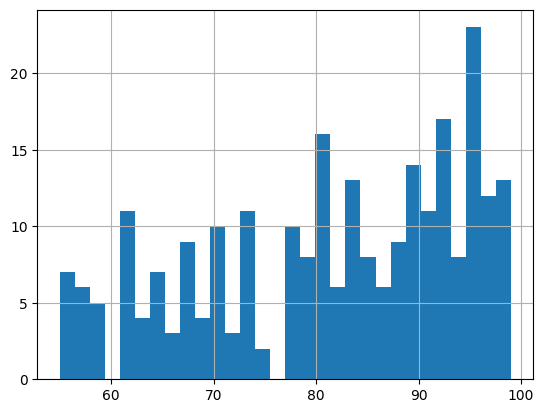

In [ ]:
data['user rating score'].hist(bins=30)

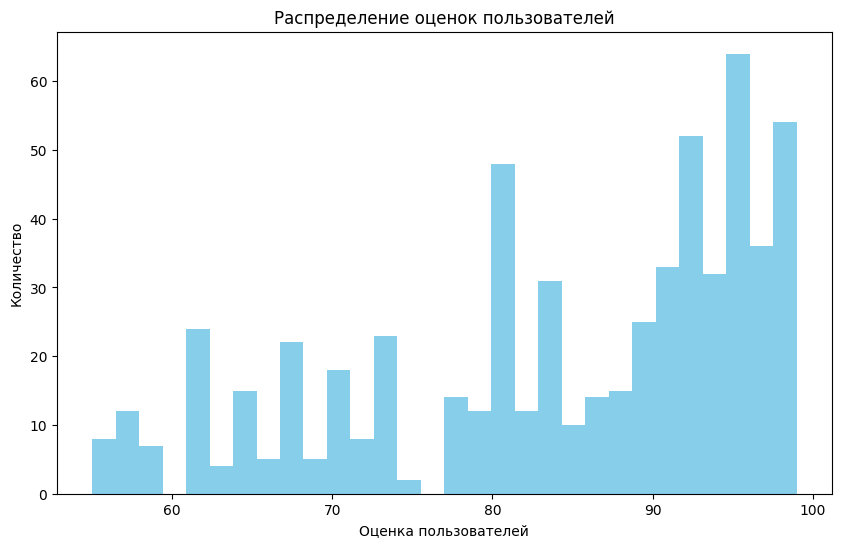

In [ ]:
# Подсчет оценок пользователей
user_rating_counts = data['user rating score'] #.value_counts()

# Построение гистограммы
plt.figure(figsize=(10, 6))
user_rating_counts.plot(kind='hist', bins=30, color='skyblue')
plt.xlabel('Оценка пользователей')
plt.ylabel('Количество')
plt.title('Распределение оценок пользователей')
plt.show()



Почему именно такие оценки ставят чаще всего, можно объяснить тем, что многие пользователи могут быть склонны ставить оценки, которые по их мнению близки к среднему значению или наиболее распространенным значениям. Например, если оценки представлены на шкале от 1 до 10, пользователи могут чаще ставить оценки вроде 7, 8 или 9, так как это значения, которые они считают хорошими, но не являются крайними. Это может быть результатом психологических предпочтений пользователей и их желания выразить среднюю положительную оценку.

### Выведите основную информацию об оценках пользователей
- Чему равны среднее, стандартное отклонение, минимум, максимум, медиана?
- Отличаются ли медиана и среднее?
- Могут ли данные характеристики значительно отличаться? Почему?

In [ ]:
# Основная информация об оценках пользователей
user_rating_info = data['user rating score'].describe()

# Вывод информации
print("Среднее:", user_rating_info['mean'])
print("Стандартное отклонение:", user_rating_info['std'])
print("Минимум:", user_rating_info['min'])
print("Максимум:", user_rating_info['max'])
print("Медиана:", user_rating_info['50%'])

Среднее: 81.3984375
Стандартное отклонение: 12.730904096632221
Минимум: 55.0
Максимум: 99.0
Медиана: 83.5


Медиана и среднее могут отличаться, особенно если распределение оценок не является нормальным. Например, наличие небольшого числа очень низких или очень высоких оценок может существенно повлиять на среднее значение, тогда как медиана будет менее подвержена такому влиянию.

Данные характеристики могут отличаться, особенно если есть выбросы в данных. Выбросы могут значительно влиять на среднее, делая его менее репрезентативным для центральной части распределения. В то время как медиана более устойчива к выбросам, и она представляет центральное значение, разделяющее наблюдения пополам.

### В какие годы были запущены шоу, представленные в датасете?

In [ ]:
# Получение уникальных годов
unique_release_years = data['release year'].unique()

# Вывод уникальных годов
print("Годы выпуска шоу:", unique_release_years)

Годы выпуска шоу: [2004 2006 2016 2008 2014 2013 2017 2015 2011 2009 2007 2012 2003 2001
 2010 1998 1999 1978 2005 1993 2002 1976 1989 1996 1997 2000 1994 1982
 1990 1940 1986 1995 1991 1992 1987]


### Постройте график, показывающий распределение количества запущенных шоу в зависимости от года.

- Наблюдается ли рост?
- Есть ли выбросы?
- Что из себя представляют выбросы?
- Чем могут быть они вызваны?

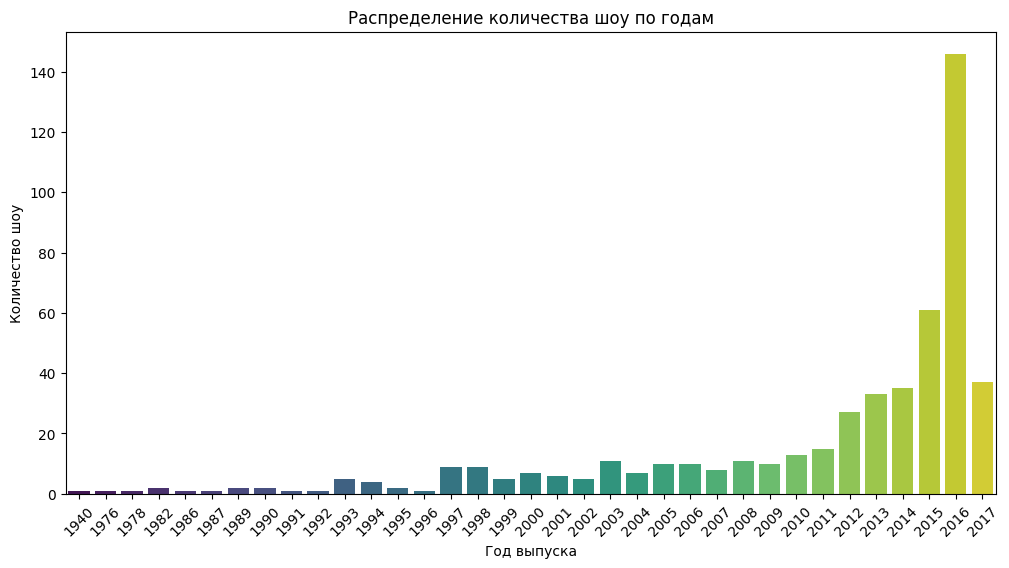

In [ ]:
# Построение графика
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='release year', palette='viridis')
plt.xlabel('Год выпуска')
plt.ylabel('Количество шоу')
plt.title('Распределение количества шоу по годам')
plt.xticks(rotation=45)
plt.show()

### Сравните среднюю оценку пользователей в 2016 со средней оценкой в 2017.
- Можно ли сделать вывод, что 2017 год успешнее для Netflix? ("Успешнее" значит, что пользователи в среднем ставили более высокие оценки)
- Как еще можно оценить "Успешность"?



In [ ]:
# Отфильтровать данные для 2016 и 2017 годов
data_2016 = data[data['release year'] == 2016]
data_2017 = data[data['release year'] == 2017]

# Вычислить средние оценки
mean_rating_2016 = data_2016['user rating score'].mean()
mean_rating_2017 = data_2017['user rating score'].mean()

print("Средняя оценка пользователей в 2016:", mean_rating_2016)
print("Средняя оценка пользователей в 2017:", mean_rating_2017)

Средняя оценка пользователей в 2016: 84.31395348837209
Средняя оценка пользователей в 2017: 88.125



Исходя из предоставленных средних оценок пользователей в 2016 и 2017 годах, можно сделать предположение, что 2017 год был успешнее для Netflix, так как в среднем пользователи ставили более высокие оценки.

Успешность можно оценить проаназировав по отдельности оценки за 2016 и 2017 года в каждом шоу. Возможно количество оценок и количество шоу в 2016 и 2017 годах сильно отличается.

### Как нагляднее будет показать распределение пользователям по рейтинговым группам?

Ниже представлены два графика, показывающие распределение шоу по рейтинговым группам. Какой тип графика визуально более интерпретируемый? ([Подсказка](https://sun9-40.userapi.com/c854228/v854228652/c754f/j6z5gMjJy2k.jpg))  
Постройте самостоятельно график, который считаете более интерпретируемым. Сделайте вывод.

![Charts](https://pp.userapi.com/c852024/v852024281/1a53b1/jSOsBIhxK3U.jpg)

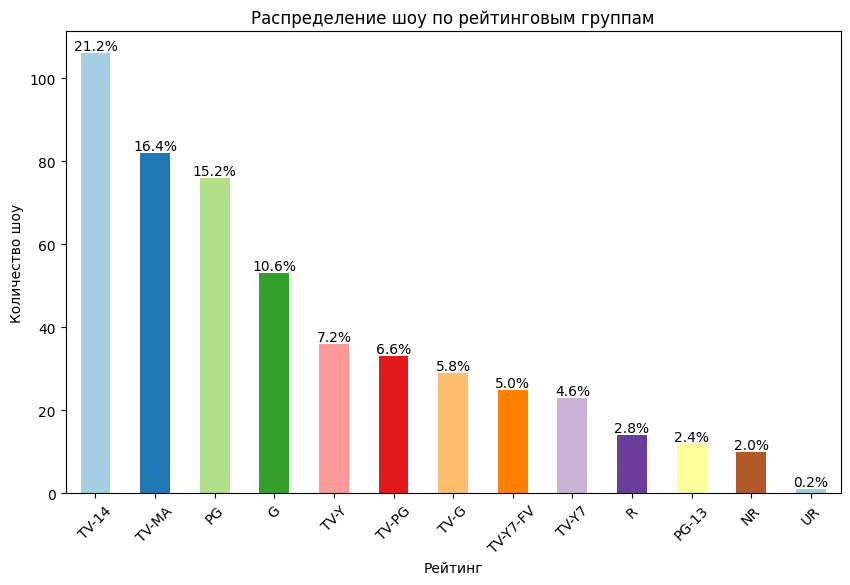

In [ ]:
# Подсчет количества шоу по рейтинговым группам
rating_counts = data['rating'].value_counts()

# Создание столбчатой диаграммы
plt.figure(figsize=(10, 6))
ax = rating_counts.plot(kind='bar', color=plt.cm.Paired.colors)

# Добавление заголовка и подписей к осям
plt.title('Распределение шоу по рейтинговым группам')
plt.xlabel('Рейтинг')
plt.ylabel('Количество шоу')
plt.xticks(rotation=45)

# Добавление процентов на столбцах
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height / sum(rating_counts) * 100:.1f}%',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom')

# Показать диаграмму
plt.show()

### Теперь вам нужно выбрать любое из представленных шоу и при помощи изученных инструментов составить описательный портрет этого шоу :)
Аналитики и Data Scientist-ы очень любят все сравнивать, поэтому при составлении описательного портрета рекомендуем вам сравнить выбранное шоу с другими по каким-либо характеристикам. Результаты не забудьте внести в презентацию. При возникновении трудностей обязательно пишите в чат, преподавателю или ассистентам.

Шоу для описательного портрета решено было выбрать: "Prison Break"

In [ ]:
data[data['title'] == 'Prison Break']

,title,rating,ratingLevel,release year,user rating score
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,2008,98.0


In [ ]:
# Найти индекс строки с шоу "Prison Break"
prison_break_index = data[data['title'] == 'Prison Break'].index[0]

# Отсортировать данные по убыванию user rating score
sorted_data = data.sort_values(by='user rating score', ascending=False)

# Найти позицию шоу "Prison Break" в отсортированных данных
position = sorted_data[sorted_data['title'] == 'Prison Break'].index[0] + 1

print("Место шоу 'Prison Break' по оценке пользователей:", position)

Место шоу 'Prison Break' по оценке пользователей: 4


In [ ]:
# Найти оценку Prison Break
prison_break_rating = data[data['title'] == 'Prison Break']['user rating score'].iloc[0]

# Отфильтровать данные для шоу с оценкой выше или равной Prison Break
similarly_rated_shows = data[data['user rating score'] >= prison_break_rating]

# Вывести список шоу
similarly_rated_shows_list = similarly_rated_shows['title'].tolist()
print("Шоу с оценкой пользователей выше или равной Prison Break:")
print(similarly_rated_shows_list)
print('Количество шоу с оценкой пользователей выше или равной Prison Break: ' + str(len(similarly_rated_shows_list)-1))

Шоу с оценкой пользователей выше или равной Prison Break:
["Grey's Anatomy", 'Prison Break', 'The Walking Dead', 'Once Upon a Time', "Marvel's Iron Fist", 'The Flash', '13 Reasons Why', 'Family Guy', 'Criminal Minds', 'Friends', 'Orange Is the New Black', 'Finding Dory', 'Lost']
Количество шоу с оценкой пользователей выше или равной Prison Break: 12


In [ ]:
data[data['title'].isin(similarly_rated_shows_list)]

,title,rating,ratingLevel,release year,user rating score
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,98.0
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,2008,98.0
8,The Walking Dead,TV-MA,For mature audiences. May not be suitable for...,2015,98.0
10,Once Upon a Time,TV-PG,Parental guidance suggested. May not be suitab...,2016,98.0
25,Marvel's Iron Fist,TV-MA,NaN,2017,98.0
27,The Flash,TV-PG,Parental guidance suggested. May not be suitab...,2016,98.0
41,13 Reasons Why,TV-MA,For mature audiences. May not be suitable for...,2017,99.0
62,Family Guy,TV-MA,For mature audiences. May not be suitable for...,2015,98.0
63,Criminal Minds,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,98.0
64,Friends,TV-14,Parents strongly cautioned. May be unsuitable ...,2003,98.0


Шоу 'Prison Break' имеет наивысшую оценку на ряду с другими 12-ю шоу, которую имеют такую же оценку.

In [ ]:

# Создание словаря соответствий между рейтингами и числовыми значениями
rating_scale = {
    'G': 1,
    'TV-Y': 2, 'TV-G': 2, 'PG': 2,
    'TV-Y7': 3, 'TV-Y7-FV': 3, 'PG-13': 3,
    'TV-PG': 4, 'R': 4,
    'TV-14': 5, 'NR': 5, 'UR': 5, 'TV-MA': 5
}

# Применение словаря для преобразования рейтинговых групп в числовые значения
data['numeric_rating'] = data['rating'].map(rating_scale)

<ipython-input-98-c12ca38ca6c2>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['numeric_rating'] = data['rating'].map(rating_scale)


In [ ]:
data

,title,rating,ratingLevel,release year,user rating score,numeric_rating
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",2004,82.0,3
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",2006,NaN,4
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,98.0,5
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,2008,98.0,5
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,2014,94.0,4
...,...,...,...,...,...,...
989,Russell Madness,PG,some rude humor and sports action,2015,NaN,2
993,Wiener Dog Internationals,G,General Audiences. Suitable for all ages.,2015,NaN,1
994,Pup Star,G,General Audiences. Suitable for all ages.,2016,NaN,1
997,Precious Puppies,TV-G,Suitable for all ages.,2003,NaN,2


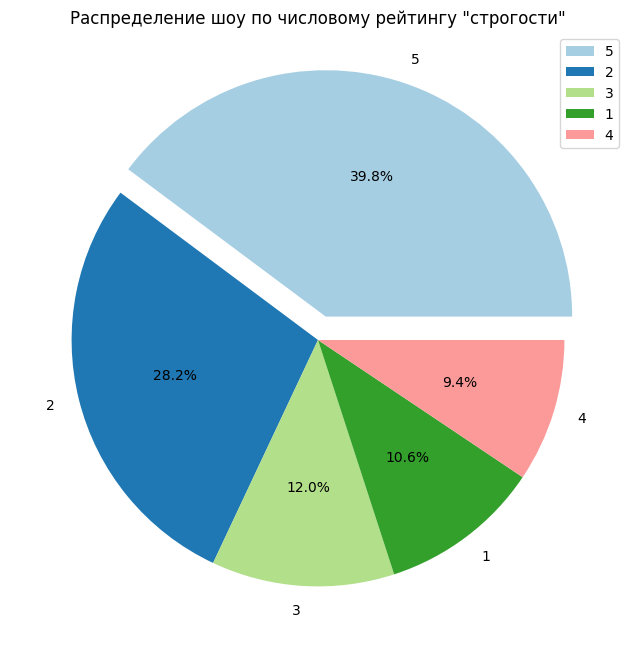

In [ ]:
# Подсчет количества шоу по числовому рейтингу
rating_counts = data['numeric_rating'].value_counts()

# Построение круговой диаграммы с выделением 5-ой категории (наибольшей строгости)
explode = (0.1, 0, 0, 0, 0)  # Выделяем 5-ую категорию
plt.figure(figsize=(8, 8))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors, explode=explode)
plt.title('Распределение шоу по числовому рейтингу "строгости"')
plt.legend(rating_counts.index, loc='upper right')
plt.show()


Из диаграммы можно вывод, что наибольшее число шоу относиться к самой высокой категории "строгости" и шоу "Prison break" тоже относиться к данной категории.

In [ ]:
# Найти ratingLevel для "Prison Break"
prison_break_rating_level = data[data['title'] == 'Prison Break']['ratingLevel'].iloc[0]

# Отфильтровать данные для шоу с таким же ratingLevel
similar_rating_level_shows = data[data['ratingLevel'] == prison_break_rating_level]

# Вывести список шоу
similar_rating_level_shows_list = similar_rating_level_shows['title'].tolist()
print("Шоу с таким же ratingLevel как 'Prison Break':")
data[data['title'].isin(similar_rating_level_shows_list)]

Шоу с таким же ratingLevel как 'Prison Break':


,title,rating,ratingLevel,release year,user rating score
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,98.0
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,2008,98.0
5,Supernatural,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,95.0
7,The Vampire Diaries,TV-14,Parents strongly cautioned. May be unsuitable ...,2017,91.0
9,Pretty Little Liars,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,96.0
...,...,...,...,...,...
465,Blue Bloods,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,95.0
475,Forensic Files,TV-14,Parents strongly cautioned. May be unsuitable ...,2011,88.0
479,Rectify,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,NaN
485,American Crime,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,NaN


<ipython-input-113-ab402574be14>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ratingLevel'] = data['ratingLevel'].apply(lambda x: 'Other' if x in small_categories else x)


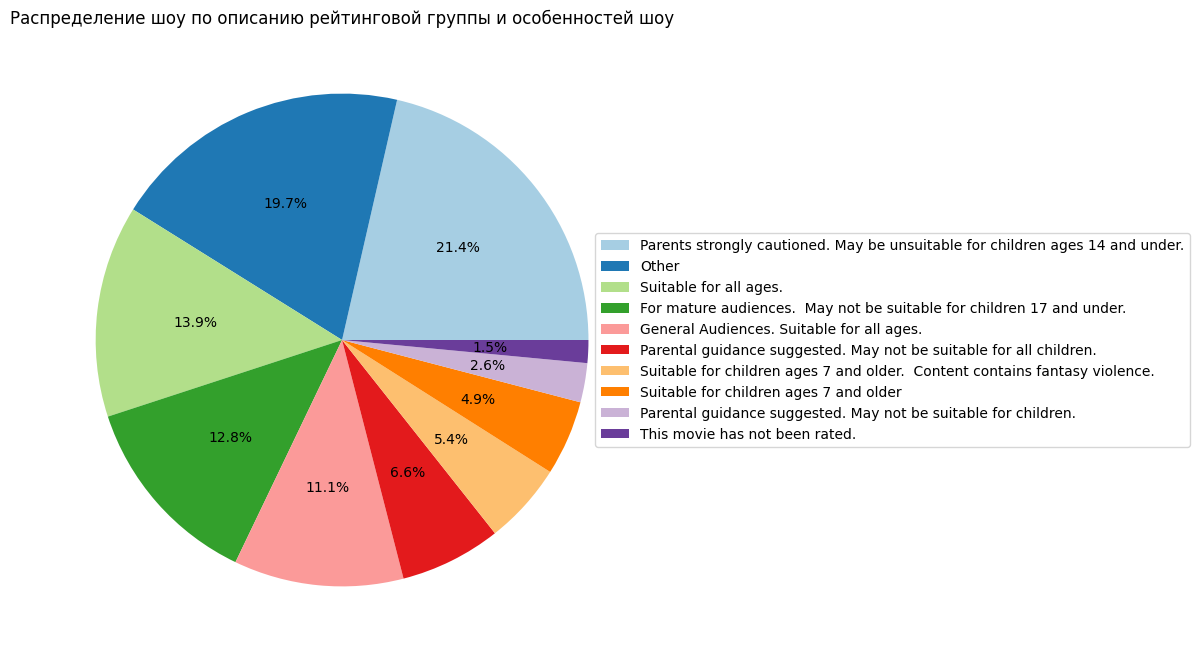

In [ ]:
# Подсчет количества шоу по ratingLevel
rating_level_counts = data['ratingLevel'].value_counts()

# Фильтрация данных для долей меньше 1%
threshold = 0.01  # Порог для долей
small_categories = rating_level_counts[rating_level_counts / rating_level_counts.sum() < threshold]
data['ratingLevel'] = data['ratingLevel'].apply(lambda x: 'Other' if x in small_categories else x)

# Обновленный подсчет количества шоу после объединения долей
updated_rating_level_counts = data['ratingLevel'].value_counts()

# Построение круговой диаграммы без надписей и с легендой за диаграммой
plt.figure(figsize=(8, 8))
plt.pie(updated_rating_level_counts, labels=None, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title('Распределение шоу по описанию рейтинговой группы и особенностей шоу')
plt.legend(updated_rating_level_counts.index,  loc='center left', bbox_to_anchor=(0.9, 0.5))
plt.show()

Описание рейтинговой группы и особенностей шоу у многих одинаковое и описание шоу 'Prison break" совпадает с 21.4% шоу, представленных в датасете.

<ipython-input-111-3461249f659b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shows_in_prison_break_year.dropna(inplace=True)


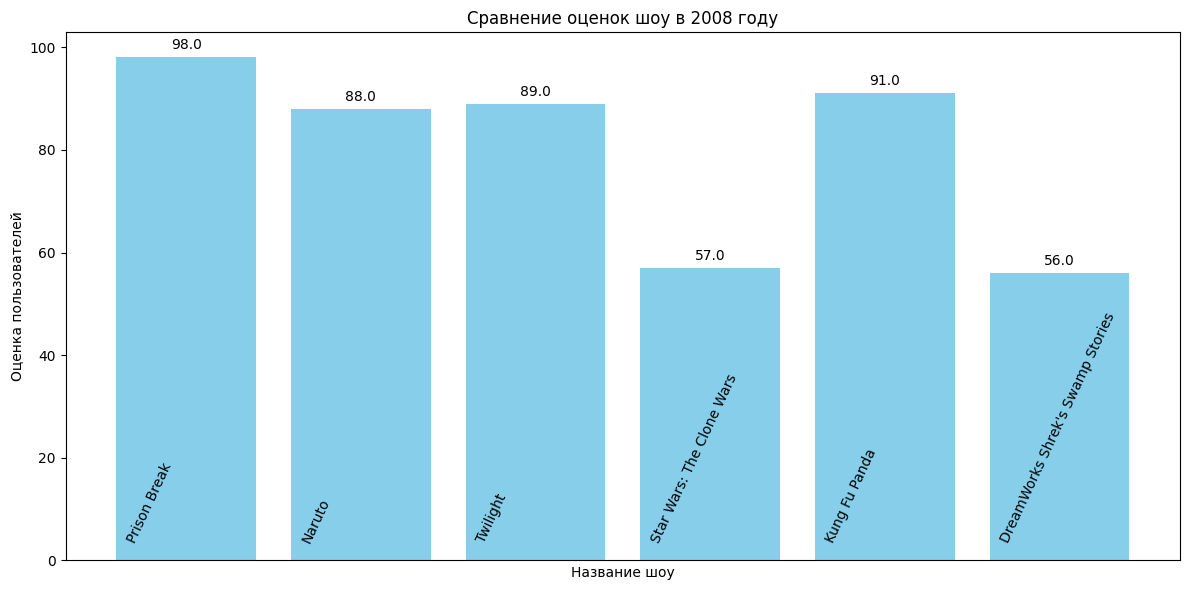

In [ ]:
# Найти год выпуска "Prison Break"
prison_break_year = data[data['title'] == 'Prison Break']['release year'].iloc[0]

# Отфильтровать данные для года выпуска "Prison Break"
shows_in_prison_break_year = data[data['release year'] == prison_break_year]

shows_in_prison_break_year.dropna(inplace=True)

# Построение графика сравнения оценок шоу в году выпуска Prison Break
plt.figure(figsize=(12, 6))
plt.bar(shows_in_prison_break_year['title'], shows_in_prison_break_year['user rating score'][:6], color='skyblue')
plt.xlabel('Название шоу')
plt.ylabel('Оценка пользователей')
plt.title(f'Сравнение оценок шоу в {prison_break_year} году')

# Добавление названий шоу поверх столбцов
for bar, title, rating in zip(bars, shows_in_prison_break_year['title'], shows_in_prison_break_year['user rating score']):
    yval = bar.get_y()+3
    yval1 = bar.get_height()+1
    plt.text(bar.get_x()+0.05, yval, title, va='bottom', fontsize=10, rotation=65)
    plt.text(bar.get_x() + bar.get_width()/2, yval1, rating, va='bottom', ha='center', fontsize=10)
#    plt.text(bar.get_x() + bar.get_width()/2, yval1, str(rating), ha='center', fontsize=10, fontweight='bold')

plt.xticks([])
plt.tight_layout()
plt.show()

Как можно заметить из графика выше, шоу "Prison break" в год его выпуска было наиболее высоко оцениваемым пользователями Netflix.